Part 1


In [4]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import optimize

days= np.genfromtxt("./ASTR19_Data.txt",dtype=float,skip_header= 3,usecols=(0))
time = np.genfromtxt("./ASTR19_Data.txt",dtype=str,skip_header=3,usecols=(1))
measurement = np.genfromtxt("./ASTR19_Data.txt",dtype=float,skip_header=3,usecols=(2))

def f_linevariations(x,a,b,c,d):
    return a*np.cos((b/c)*x)+ d



Part 2
Graphing Data and Fitted Function

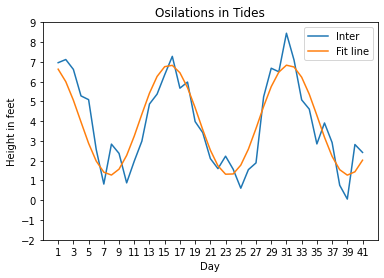

In [5]:
High, Low, HighLow = [],[],[]

x = np.linspace(1,41,41)

error = np.full(41,0.25)

for i in range(0,82,2):
    High.append(measurement[i])
for i in range (1,82,2):
    Low.append(measurement[i])
for i in range (len(High)):
    HighLow.append(High[i]-Low[i])

  
params,params_cov = optimize.curve_fit(f_linevariations,x,HighLow,sigma=error,p0=[3.6,12,28,4])
a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

y_fit = a_fit*np.cos((b_fit/c_fit)*x)+ d_fit

plt.plot(x,HighLow,label ='Inter')
plt.plot(x,y_fit,label = 'Fit line')
plt.xlabel('Day')
plt.ylabel('Height in feet')
plt.title('Osilations in Tides')
plt.legend()
plt.yticks([-2,-1,0,1,2,3,4,5,6,7,8,9])
plt.xticks([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41])

#plt.errorbar(x,HighLow,yerr=0.25,fmt='o')


plt.show()

Part 3
Residuals Scatter Plot

In [ ]:
Residuals = []
line0 = np.linspace(0,0,41)
for i in range(len(x)):
    Residuals.append(HighLow[i]- (a_fit*np.cos((b_fit/c_fit)*i)+ d_fit))
    
    
plt.scatter(x,Residuals)
plt.plot(x,line0)
plt.show()